In [1]:
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('kc_house_data.csv.zip', dtype=dtype_dict)
Train = pd.read_csv('kc_house_train_data.csv.zip', dtype=dtype_dict)
Test = pd.read_csv('kc_house_test_data.csv.zip', dtype=dtype_dict)

In [4]:
def get_numpy_data(data,features,output):
    data['constant'] = 1
    features = ['constant'] + features
    feat_data = data[features]
    features_matrix = feat_data.values
    out = data[output]
    output_array = out.values
    return(features_matrix, output_array)

In [5]:
def predict_out(feat_mat,weights):
    return np.dot(feat_mat,weights)

In [16]:
def feature_derivative_ridge(errors,weight,feature,l2_penality,feat_is_constant):
    if (feat_is_constant):
        return 2*np.dot(errors,feature)
    else:
        return 2*np.dot(errors,feature) + 2*l2_penality*weight

In [17]:
feat_mat,output = get_numpy_data(sales,['sqft_living'],'price')

In [20]:
weights = np.array([1.,10.])
predicted = predict_out(feat_mat=feat_mat,weights=weights)
errors = predicted - output
derivative_const = feature_derivative_ridge(errors=errors,weight=weights[0],feature=feat_mat[:,1],l2_penality=1,feat_is_constant=True)
derivative_not_const = feature_derivative_ridge(errors=errors,weight=weights[1],feature=feat_mat[:,0],l2_penality=1.,feat_is_constant=False)

In [22]:
derivative_const , derivative_not_const

(-56554166815970.0, -22446749310.0)

In [43]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
        #while not reached maximum number of iterations:
        # compute the predictions using your predict_output() function
    for i in range (max_iterations):
        predictions = predict_out(feat_mat=feature_matrix,weights=weights)
        # compute the errors as predictions - output
        errors = predictions - output
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if (i==0):
                const = True
            else:
                const = False
            derivative = feature_derivative_ridge(errors=errors,feature=feature_matrix[:,i],l2_penality=l2_penalty,weight=weights[i],feat_is_constant=const)
            weights[i] = weights[i] - (derivative*step_size)
            # subtract the step size times the derivative from the current weight  
    return weights

In [40]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(Train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(Test, simple_features, my_output)

In [41]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.array([0.,0.])

In [51]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights, step_size, 0, max_iterations)
print(simple_weights_0_penalty)

[-1.63113515e-01  2.63024369e+02]


In [52]:
simple_weights_large_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights, step_size, 1e11, max_iterations)
print(simple_weights_large_penalty)

[  9.76730382 124.57217567]


In [53]:
import matplotlib.pyplot as plt

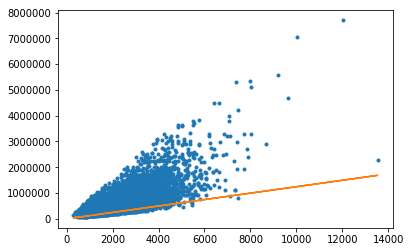

In [54]:
%matplotlib inline
predicted_Train = predict_out(feat_mat=simple_feature_matrix,weights=simple_weights_large_penalty)
plt.plot(Train['sqft_living'],Train['price'],'.',Train['sqft_living'],predicted_Train)

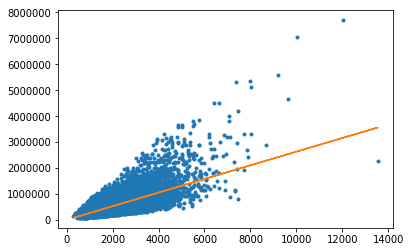

In [55]:
%matplotlib inline
predicted_Train = predict_out(feat_mat=simple_feature_matrix,weights=simple_weights_0_penalty)
plt.plot(Train['sqft_living'],Train['price'],'.',Train['sqft_living'],predicted_Train)

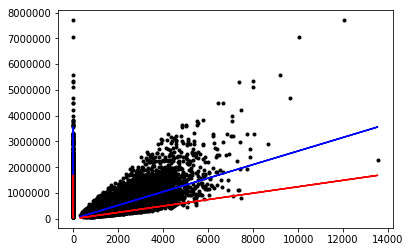

In [58]:
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_out(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_out(simple_feature_matrix, simple_weights_large_penalty),'r-')

In [68]:
# RSS for weights = 0:
initial_pred = predict_out(simple_test_feature_matrix,initial_weights)
init_residuals = initial_pred - test_output
RSS_0 = (init_residuals**2).sum()
RSS_0

1784273286136298.0

In [70]:
# RSS for weights with 0 l2_pen. :
no_regularization_pred = predict_out(simple_test_feature_matrix,simple_weights_0_penalty)
no_reg_residuals = no_regularization_pred - test_output
RSS_no_reg = (no_reg_residuals**2).sum()
RSS_no_reg

275723632153607.44

In [71]:
# RSS for weights with large l2_pen. :
regularization_pred = predict_out(simple_test_feature_matrix,simple_weights_large_penalty)
reg_residuals = regularization_pred - test_output
RSS_reg = (reg_residuals**2).sum()
RSS_reg

694642101489902.8

In [75]:
mult_feat_matrix,train_output = get_numpy_data(data=Train,features=['sqft_living','sqft_living15'],output='price')
mult_test_feat_matrix,test_output = get_numpy_data(data=Test,features=['sqft_living','sqft_living15'],output='price')

In [77]:
initial_weights = np.array([0.,0.,0.])
step_size = 1e-12
max_iterations = 1000

In [78]:
# RSS for Mult_weights = 0:
initial_pred = predict_out(mult_test_feat_matrix,initial_weights)
init_residuals = initial_pred - test_output
RSS_0 = (init_residuals**2).sum()
RSS_0

1784273286136298.0

In [79]:
Mult_weights_0pen = ridge_regression_gradient_descent(feature_matrix=mult_feat_matrix,initial_weights=initial_weights,l2_penalty=0,max_iterations=1000,output=train_output,step_size=step_size)

In [83]:
# RSS for mult weights with 0 l2_pen. :
no_regularization_mult_pred = predict_out(mult_test_feat_matrix,Mult_weights_0pen)
no_reg_mult_residuals = no_regularization_mult_pred - test_output
RSS_no_reg = (no_reg_mult_residuals**2).sum()
RSS_no_reg 

274067615918575.56

In [84]:
Mult_weight_largepen = ridge_regression_gradient_descent(feature_matrix=mult_feat_matrix,initial_weights=initial_weights,l2_penalty=1e11,max_iterations=1000,output=train_output,step_size=step_size)

In [87]:
# RSS for mult weights with large l2_pen. :
regularization_mult_pred = predict_out(mult_test_feat_matrix,Mult_weight_largepen)
reg_mult_residuals = regularization_mult_pred - test_output
RSS_reg = (reg_mult_residuals**2).sum()
RSS_reg

500404800500841.6

In [90]:
reg_mult_residuals[0]

-39546.469678059395

In [92]:
no_reg_mult_residuals[0]

77465.47605823533